# freud.order.Nematic: Nematic tensor and nematic and smectic order parameters

The nematic tensor, 𝐐, is used to detect orientational order in anisotropic particle systems. For a given probability distribution, $f(\mathbf{m})$, of particle orientations in 3D, it can be defined by first considering a weighted integral over the outer product of vectors tangent to the partcicles. The resulting second-order tensor, 𝐌, which is symmetric and semidefinite positive, is defined as

$$
\mathbf{M} = \int_{\mathcal{B}} (\mathbf{m} \otimes \mathbf{m}) f(\mathbf{m}) d\sigma(\mathbf{m}) \quad (1)
$$

where $\mathbf{m}$ is the $\textit{molecular axis}$ (i.e. the vector tangent to a particle's principal axis) and $\mathcal{B}$ is the unit hemisphere. 𝐐 is defined by the traceless tensor:

$$
\mathbf{Q} = \mathbf{M} - \frac{1}{3} \mathbf{I} \quad (3)
$$

where 𝐈 is the identity matrix. For uniaxial systems, 𝐐 may also be written in terms of the $\textit{nematic director}$ ($n$), which is the principal direction of alignment in the system. For a more detailed account of the nematic tensor, and the extension of this to biaxial systems, see Section I of [Mottram and Newton](https://strathprints.strath.ac.uk/50668/1/1409.3542v2.pdf).

$$
\mathbf{Q} = S (\mathbf{n} \otimes \mathbf{n} - \frac{1}{3} \mathbf{I}) \quad (4)
$$

Here, the scalar order parameter, S, is defined as:

$$
S = \frac{1}{2} \int_{\mathcal{B}} (3\cos^2 \beta - 1) \quad (5)
$$

where $\beta$ is the angle between the molecular axis and nematic director. Whilst the nematic director is used to charaterise the direction of orientational order, S characterises its magnitude and varies from 0 to 1 during the isotropic to nematic phase transition. As noted in [Turzi](https://pubs.aip.org/aip/jmp/article/52/5/053517/232507/On-the-Cartesian-definition-of-orientational-order), the eigenvalues of $Q$ are $\frac{2}{3}S$ which is associated with the eigenvector which is the nematic director $\mathbf{n}$, and doubly degenerate eigenvalues $-\frac{1}{3}S$. The values of interest, the nematic director $\mathbf{n}$ and $S$ can be identified as the eigenvalue whose sign is different from other eigenvalues, or is the maximum eigenvalue, and it's eigenvector.



# Example on a disordered system
We start by considering a random system of particles with random orientations and positions. Naturally, the nematic order parameter should be zero for such a particle orientation set. Let's see how to calculate this using freud. Since version 3.0 freud's Nematic order parameter does not require specification of starting orientations when class is instantiated. The compute method now takes orientation vectors of particles instead of quaternions.

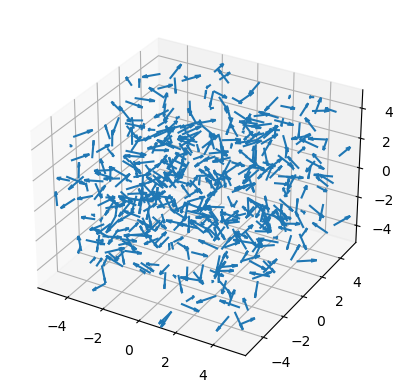

The value of the order parameter is 0.020104877650737762.


In [2]:
import freud
import matplotlib.pyplot as plt
import numpy as np
import rowan

%matplotlib inline

# box length
L = 10
# number of particles
N = 500
# make a system
box, points = freud.data.make_random_system(L, N, seed=0)

# make random orientations using rowan
orientations = rowan.rotate(rowan.random.rand(N), [1, 0, 0])

# make a 3D plot of the system
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.quiver3D(
    points[:, 0],
    points[:, 1],
    points[:, 2],
    orientations[:, 0],
    orientations[:, 1],
    orientations[:, 2],
    normalize=True,
)
plt.show()

# specification of "molecular director" for Nematic class is no longer required
nematic = freud.order.Nematic()
# new freud API uses orientations instead of quaternions
nematic.compute(orientations)
print(f"The value of the order parameter is {nematic.order}.")

As we can see the calculated nematic order parameter is very close to zero indicating that there is no order in the orientation of the particles. This makes sense given, that orientations were generated randomly. 

# Liquid crystal in a nematic phase

Nematic phase is defined as a phase in which the value of the nematic order parameter in the range between 0.3 and 0.7. The positions are disordered, but the orientations show some order in the preferred direction dictated by the director.

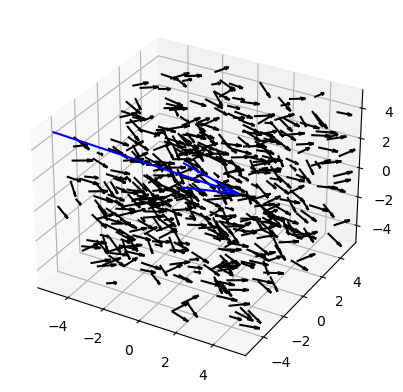

The value of the order parameter is 0.5028241276741028.
Director is [ 0.9990647  -0.0269941  -0.03378153].


In [3]:
# We start with all orientations pointing in the same direction
orientations = np.asarray(
    [
        [1, 0, 0],
    ]
    * N
)


def randomize_orientations(orientations, perturbation_magnitude):
    randomized_orientations = []
    for orientation in orientations:
        phi = np.random.uniform(0, 2 * np.pi)
        costheta = np.random.uniform(-1, 1)
        theta = np.arccos(costheta)

        perturbation = (
            np.array(
                [
                    np.sin(theta) * np.cos(phi),
                    np.sin(theta) * np.sin(phi),
                    np.cos(theta),
                ]
            )
            * perturbation_magnitude
        )

        new_orientation = orientation + perturbation
        # Normalize the new orientation vector to maintain unit length
        new_orientation /= np.linalg.norm(new_orientation)
        randomized_orientations.append(new_orientation)
    return np.array(randomized_orientations)


# We rotate starting orientations [1,0,0] slightly, in a random direction
orientations = randomize_orientations(orientations, 0.75)
# make a 3D plot of the system
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.quiver3D(
    points[:, 0],
    points[:, 1],
    points[:, 2],
    orientations[:, 0],
    orientations[:, 1],
    orientations[:, 2],
    normalize=True,
    color="k",
)

# specification of "molecular director" for Nematic class is no longer required
nematic = freud.order.Nematic()
# new freud API uses orientation vectors instead of quaternions
nematic.compute(orientations)
# get the director
director = nematic.director
# plot the director as a blue arrow
ax.quiver3D(
    -L / 2,
    -L / 2,
    L / 2,
    director[0],
    director[1],
    director[2],
    length=L,
    normalize=True,
    color="blue",
)
plt.show()
print(f"The value of the order parameter is {nematic.order}.")
print(f"Director is {nematic.director}.")

The nematic order parameter is now around 0.5 meaning that there is a preferred direction of orientations of particles in our system. Freud also computes the whole nematic tensor ($Q$). One can "manually" compute the nematic order ($S$) parameter from the nematic tensor ($Q$) by diagonalizing it and taking the largest eigenvalue which corresponds to the nematic order parameter $S$. The direction of preferred orientation of particles in our system is given by the director vector. The director vector is just the eigenvector corresponding to the largest eigenvalue of nematic tensor $Q$ which gives us the nematic order parameter.

To establish how the nematic order parameter changes with more or less randomization of the system we construct a series of system snapshots with slowly increasing degrees of randomization of orientations.

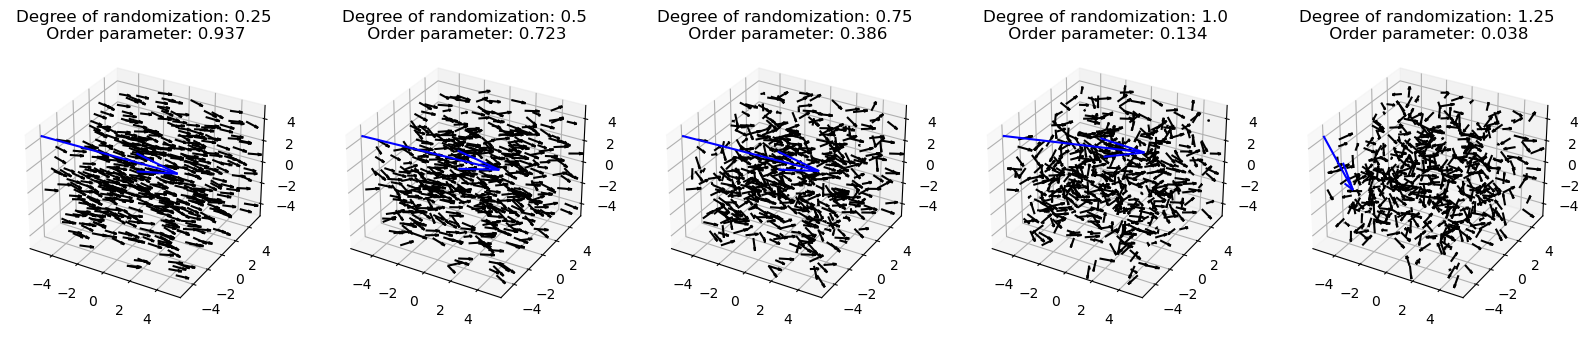

In [27]:
orientations = np.asarray(
    [
        [1, 0, 0],
    ]
    * N
)
# amount of randomization for system snapshots
randomization = [0.25, 0.5, 0.75, 1.0, 1.25]
# make multiple 3D subplots 
fig, axes = plt.subplots(nrows=1, ncols=len(randomization), 
figsize=(20, 4), subplot_kw={'projection': '3d'})
# instantiate the Nematic class
nematic = freud.order.Nematic()
for ax, degree_of_randomization in zip(axes,randomization):
    # We randomly rotate the starting orientations using a given degree of randomization
    orientations = randomize_orientations(orientations, degree_of_randomization)
    # compute the order parameter
    nematic.compute(orientations)
    ax.set_title(f"Degree of randomization: {degree_of_randomization}\n Order parameter: {nematic.order:.3f}")
    # make a 3D plot of the system
    ax.quiver3D(
        points[:, 0],
        points[:, 1],
        points[:, 2],
        orientations[:, 0],
        orientations[:, 1],
        orientations[:, 2],
        normalize=True,
        color="k",
    )

    ax.quiver3D(
    -L / 2,
    -L / 2,
    L / 2,
    nematic.director[0],
    nematic.director[1],
    nematic.director[2],
    length=L,
    normalize=True,
    color="blue",
)

As we can see more randomization brings us closer to a disordered state, meaning that the nematic order parameter is dropping towards zero. 

And finally we confirm that perfectly ordered system gives the nematic order parameter of 1.

In [ ]:
# all orientations point in the same direction [1,0,0]
orientations = np.asarray(
    [
        [1, 0, 0],
    ]
    * N
)
# make a 3D plot of the system
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.quiver3D(
    points[:, 0],
    points[:, 1],
    points[:, 2],
    orientations[:, 0],
    orientations[:, 1],
    orientations[:, 2],
    normalize=True,
    color="k",
)
plt.show()

# new freud API uses orientation vectors instead of quaternions
nematic.compute(orientations)
print(
    f"The value of the order parameter for perfectly oriented system is {nematic.order}."
)

# Smectic phases and smectic order parameter

In systems with nematic (orientational) many other types of phases can exist. When position in exactly one dimension is ordered alongside orientations we get smectic phases. There are many different types of smectic phases. The simplest one of them is called smectic A. In smectic A phase the particles are organized in layers and layer surface normal is aligned with nematic director. The phase in which layer director does not align with particle's long axes is called smectic C phase. We shall focus on smecitc A phase in this tutorial.


In [ ]:
import numpy as np


def generate_smectic_a_positions(
    num_particles, box_size, layer_thickness, particle_radius
):
    """
    Generates particle positions in a smectic A phase.

    Parameters:
    num_particles (int): Number of particles to generate.
    box_size (float): Side length of the cubic simulation box.
    layer_thickness (float): Thickness of each smectic A layer.
    particle_radius (float): Radius of the particles.

    Returns:
    np.ndarray: A NumPy array containing the particle positions (shape: num_particles x 3).
    """
    particles_per_layer = int(num_particles // (box_size / layer_thickness))
    num_layers = int(num_particles / particles_per_layer)

    positions = []

    for layer in range(num_layers):
        z = layer * layer_thickness + layer_thickness / 2
        particles_in_layer = 0

        while particles_in_layer < particles_per_layer:
            x = np.random.uniform(particle_radius, box_size - particle_radius)
            y = np.random.uniform(particle_radius, box_size - particle_radius)

            position = np.array([x, y, z])
            positions.append(position)
            particles_in_layer += 1

    return np.array(positions[:num_particles])


# Example usage:
num_particles = 1000
box_size = 100
layer_thickness = 5
particle_radius = 1

points = generate_smectic_a_positions(
    num_particles, box_size, layer_thickness, particle_radius
)

orientations = np.asarray(
    [
        [1, 0, 0],
    ]
    * N
)
# We randomly rotate the starting orientations by a much larger amount now
orientations = randomize_orientations(orientations, 0.025)
# make a 3D plot of the system
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.quiver3D(
    points[:, 0],
    points[:, 1],
    points[:, 2],
    orientations[:, 0],
    orientations[:, 1],
    orientations[:, 2],
    normalize=True,
    color="k",
)
plt.show()


import scipy.optimize


def calc_smectic(d, director, pos):
    return -(
        np.absolute(np.sum(np.exp(np.dot(director, pos.T) * 2 * np.pi * 1j / d)))
    ) / len(pos)


nematic = freud.order.Nematic()
# new freud API uses orientation vectors instead of quaternions
nematic.compute(orientations)
print(
    f"The value of the order parameter for perfectly oriented system is {nematic.order}."
)
director = nematic.director / np.linalg.norm(nematic.director)
optd = scipy.optimize.brute(
    calc_smectic,  # function to optimize
    ranges=(
        slice(layer_thickness * 0.25, layer_thickness * 1.8, 0.10),
    ),  # range of values for optimization, these depend on the size of the particles in the direction of orientation
    args=(director, points),  # arguments to pass to calc_smectic
    finish=scipy.optimize.fmin,  # use Nelder-Mead to refine the brute force result
)[0]
smec = -calc_smectic(optd, director, points)
# compare optd to layer thickness!!!!
print(
    f"The value of the order parameter for perfectly oriented system is {smec} and distance between the layers is {optd}."
)